# MACHINE LEARNING - BINARY CLASSIFICATION MODEL PROJECT

## Author(s): Nfayem Imoro

## `Business Understanding`

Train a machine learning model to predict whether a customer is male or female

## `Data Understanding`

### Importation of all necessary packages

In [1]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
warnings.filterwarnings("ignore")

### Read Data

In [2]:
# Load the dataset into a DataFrame
dotr_df = pd.read_csv("dollar_tree-231012-195712.csv")

# Display the memory usage information of the DataFrame
print()
dotr_df.info(memory_usage="deep")
print()

# Display the first few rows of the DataFrame
dotr_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memo

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


### Perform a `brief` EDA  (info(), describe(), corr() etc)

#### Descriptive Statistics

In [3]:
# Generate descriptive statistics of the DataFrame 
dotr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,34867.0,17433.000000,10065.380254,0.000000,8716.500000,17433.0,26149.50,34866.0
Year,34866.0,2015.569237,0.495190,2015.000000,2015.000000,2016.0,2016.00,2016.0
Customer Age,34866.0,36.382895,11.112902,17.000000,28.000000,35.0,44.00,87.0
Quantity,34866.0,2.002524,0.813936,1.000000,1.000000,2.0,3.00,3.0
Unit Cost,34866.0,349.880567,490.015846,0.670000,45.000000,150.0,455.00,3240.0
Unit Price,34866.0,389.232485,525.319091,0.666667,53.666667,179.0,521.00,5082.0
Cost,34866.0,576.004532,690.500395,2.000000,85.000000,261.0,769.00,3600.0
Revenue,34867.0,640.870093,736.640033,2.000000,102.000000,319.0,902.00,5082.0
Column1,2574.0,688.054913,774.200897,2.000000,104.250000,390.5,975.75,3681.0


In [4]:
# Generate descriptive statistics for categorical columns in the DataFrame 
dotr_df.describe(include="object").T

,count,unique,top,freq
Date,34866,576,3/1/2016,196
Month,34866,12,June,3680
Customer Gender,34866,2,M,17805
Country,34866,4,United States,18076
State,34866,45,California,10332
Product Category,34866,3,Accessories,22534
Sub Category,34866,17,Tires and Tubes,11112


In [6]:
# Retrieve the unique values present in the "Customer Gender" column of the DataFrame
dotr_df["Customer Gender"].unique()

array(['F', 'M', nan], dtype=object)

#### Missing and Duplicated Values

In [7]:
# Check for total missing values in each column of the DataFrame
missing_values = dotr_df.isnull().sum()
print()
print("Missing values in each column:")
print()
print(missing_values)
print()

# Check for total duplicated rows in the DataFrame
duplicate_count = dotr_df.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()

# Select rows where values in "Column1" are not null and display the first few rows
dotr_df[~dotr_df["Column1"].isnull()].head()


Missing values in each column:

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

Number of duplicated rows: 0



,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
312,312,1/11/2016,2016.0,January,40.0,M,France,Yveline,Bikes,Road Bikes,3.0,567.0,790.0,1701.0,2370.0,2370.0
313,313,1/11/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Helmets,2.0,192.5,199.0,385.0,398.0,398.0
314,314,1/18/2016,2016.0,January,40.0,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.0,1511.5,2320.0,3023.0,3023.0
315,315,1/18/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.0,147.0,230.0,294.0,294.0
316,316,1/18/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.0,167.0,140.0,167.0,167.0


In [8]:
# Count the number of missing values in each row of the DataFrame
missing_values_per_row = dotr_df.isnull().sum(axis=1)

# Print the results
print()
print("Number of missing values per row:")
print()
print(missing_values_per_row)
print()

# Select rows where the count of missing values is greater than 1
dotr_df[dotr_df.isnull().sum(axis=1) > 1]


Number of missing values per row:

0         1
1         1
2         1
3         1
4         1
         ..
34862     1
34863     1
34864     1
34865     1
34866    14
Length: 34867, dtype: int64



,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095,NaN


## `Data Preparation`

### Data Cleaning

In [9]:
# Remove the specified columns ("Column1" and "index")
dotr_df.drop(["Column1", "index"], axis=1, inplace=True)

# Display the first few rows of the DataFrame after dropping the specified columns
dotr_df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [10]:
# Remove the row with index 34866 from the DataFrame
dotr_df.drop(34866, inplace=True)

# Display the last few rows of the DataFrame after the row removal
dotr_df.tail()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
34861,3/22/2015,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.0,1487.000000,2049.0,1487.0
34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.0,985.500000,2320.0,1971.0
34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.0,1583.000000,2049.0,1583.0
34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.0,560.666667,2049.0,1682.0
34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.0,1568.000000,2320.0,1568.0


In [11]:
# Convert 'Date' column to datetime format with specified format
dotr_df["Date"] = pd.to_datetime(dotr_df["Date"], format="%m/%d/%Y")

# Convert selected columns to integer data type
dotr_df[["Year", "Customer Age", "Quantity"]] = dotr_df[["Year", "Customer Age", "Quantity"]].apply(pd.to_numeric, errors='coerce').astype(int)

# Calculate 'Cost' column by multiplying 'Quantity' and 'Unit Cost'
dotr_df["Cost"] = dotr_df["Quantity"] * dotr_df["Unit Cost"]

# Calculate 'Revenue' column by multiplying 'Quantity' and 'Unit Price'
dotr_df["Revenue"] = dotr_df["Quantity"] * dotr_df["Unit Price"]

# Display information about the DataFrame with memory usage
print()
print("DataFrame Info with Memory Usage:")
print()
print(dotr_df.info(memory_usage="deep"))
print()

# Display the shape of the DataFrame
print("DataFrame Shape:", dotr_df.shape)
print()

# Display the first few rows of the DataFrame
dotr_df.head()


DataFrame Info with Memory Usage:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  int32         
 2   Month             34866 non-null  object        
 3   Customer Age      34866 non-null  int32         
 4   Customer Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product Category  34866 non-null  object        
 8   Sub Category      34866 non-null  object        
 9   Quantity          34866 non-null  int32         
 10  Unit Cost         34866 non-null  float64       
 11  Unit Price        34866 non-null  float64       
 12  Cost              34866 non-null  float64       
 13  Revenue           34866 non-null  float6

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.00,109.000000
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.00,57.000000
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.01,15.000000
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.00,233.000000
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.00,125.000001


### Feature Selection

#### Chi-Squared Test of Indpendence

In [12]:
# Create a copy of the original DataFrame
chidotr_df = dotr_df.copy()

# Initialize an empty dictionary to store chi-square results
chi2_results = {}

# Loop through all columns except 'Customer Gender'
for col in chidotr_df.columns:
    if col != "Customer Gender":
        # Crosstabulation between Customer Gender and current feature
        crosstab = pd.crosstab(chidotr_df["Customer Gender"], chidotr_df[col])
        
        # Chi-square test
        chi2, p, dof, expected = chi2_contingency(crosstab)
        
        # Store desired chi-square results in the dictionary
        chi2_results[col] = {"Chi-square statistic": chi2,
                             "p-value": p}

# Sort chi-square statistic and p-value separately in descending and ascending order, respectively
sorted_chi2_statistic = sorted(chi2_results.items(), key=lambda x: x[1]["Chi-square statistic"], reverse=True)
sorted_p_value = sorted(chi2_results.items(), key=lambda x: x[1]["p-value"])

# Print the chi-square statistics for features with p-value less than or equal to 0.05
print()
print("Chi-square statistic (Significant p-values (<= 0.05)) sorted in descending order:")
print()
for col, results in sorted_chi2_statistic:
    if results["p-value"] <= 0.05:
        print(f"{col}: {results['Chi-square statistic']:.2f}")

# Print the p-values for features with p-value less than or equal to 0.05
print()
print("P-values (Significant p-values (<= 0.05)) sorted in ascending order:")
print()
for col, results in sorted_chi2_statistic:
    if results["p-value"] <= 0.05:
        print(f"{col}: {results['p-value']:.4f}")
print()


Chi-square statistic (Significant p-values (<= 0.05)) sorted in descending order:

Date: 1326.53
Customer Age: 222.77
State: 152.21
Month: 57.32
Year: 27.02
Country: 10.78
Quantity: 6.31

P-values (Significant p-values (<= 0.05)) sorted in ascending order:

Date: 0.0000
Customer Age: 0.0000
State: 0.0000
Month: 0.0000
Year: 0.0000
Country: 0.0130
Quantity: 0.0427



#### Logistic Regression Test

In [13]:
# Make a copy of the original DataFrame
logrdotr_df = dotr_df.copy()

# Map month names to their equivalent numbers from 1 to 12
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}

# Apply the mapping to the 'Month' column
logrdotr_df["Month"] = logrdotr_df["Month"].map(month_map)

# Encode "Customer Gender" as binary values (1 for Male, 0 for Female)
logrdotr_df["Customer Gender"] = logrdotr_df["Customer Gender"].map({"M": 1, "F": 0})

# Perform one-hot encoding for all other categorical columns
logrdotr_df = pd.get_dummies(logrdotr_df, columns=logrdotr_df.select_dtypes(include=["object"]).columns, drop_first=True)

# Separate the target variable from the independent variables
X = logrdotr_df.drop(columns=["Customer Gender", "Date"])
y = logrdotr_df["Customer Gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.DataFrame({"Feature": X_train.columns, "Coefficient": logreg.coef_[0]})

# Group columns by their prefix before the underscore
prefixes = feature_importances["Feature"].str.split("_", n=1).str[0]

# Calculate the mean coefficient for each unique prefix
mean_coefficients = feature_importances.groupby(prefixes)["Coefficient"].mean().abs().round(4).sort_values(ascending=False)

# Print selected Features using Logistic Regression Coefficients
print()
print("Selected Features using Logistic Regression Coefficients:")
print()
print(mean_coefficients.head())
print()


Selected Features using Logistic Regression Coefficients:

Feature
Country             0.0590
Product Category    0.0306
Month               0.0149
Customer Age        0.0043
Quantity            0.0036
Name: Coefficient, dtype: float64



#### Pearson Correlation Matrix Test

In [14]:
# Make a copy of the original DataFrame
cordotr_df = dotr_df.copy()

# Map month names to their equivalent numbers from 1 to 12
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}

# Apply the mapping to the 'Month' column
cordotr_df["Month"] = cordotr_df["Month"].map(month_map)

# Encode "Customer Gender" as binary values (1 for Male, 0 for Female)
cordotr_df["Customer Gender"] = cordotr_df["Customer Gender"].map({"M": 1, "F": 0})

# Perform one-hot encoding for all other categorical columns
cordotr_df = pd.get_dummies(cordotr_df, columns=cordotr_df.select_dtypes(include=["object"]).columns, drop_first=True)

# Calculate the correlation matrix
corr_matrix = cordotr_df.corr()

# Extract correlations between "Customer Gender" and other features
gender_corr = corr_matrix["Customer Gender"]

# Initialize an empty dictionary to store correlations for each feature
overall_corr_dict = {}

# Group columns by their prefix before the underscore and also by dtype unit8
grouped_columns = cordotr_df.columns[cordotr_df.columns.str.contains("_")].str.split("_").str[0].unique()
grouped_columns_unit8 = cordotr_df.select_dtypes(include=["uint8"]).columns.str.split("_").str[0].unique()
grouped_columns = np.concatenate((grouped_columns, grouped_columns_unit8))
grouped_columns

# Iterate through grouped columns of columns
for prefix in grouped_columns:
    # Filter out columns with the current prefix
    prefix_columns = cordotr_df.filter(like=prefix + "_")
    # Calculate the mean correlation for columns with the current prefix
    filtered_corr = gender_corr.filter(like=prefix + "_").mean()
    overall_corr_dict[prefix] = filtered_corr

# Iterate through each column
for column in cordotr_df.columns:
    # Check if the column is numeric
    if cordotr_df[column].dtype in ["int32", "int64", "float64", "datetime64[ns]"]:
        # Filete the correlation between the current feature and "Customer Gender"
        corr = gender_corr[column]
        overall_corr_dict[column] = corr

# Convert the dictionary to a pandas Series, excluding "Customer Gender"
overall_corr_series = pd.Series(overall_corr_dict).drop("Customer Gender").abs().round(3).sort_values(ascending=False)

# Sort the Series to include only correlation values greater than or equal to 0.01
filtered_corr_series = overall_corr_series[overall_corr_series >= 0.01]

# Display correlation of "Customer Gender" with other features greater or equal to 0.01
print()
print("Correlation of Customer Gender with other features >= 0.01:")
print()
print(filtered_corr_series)
print()


Correlation of Customer Gender with other features >= 0.01:

Year            0.028
Month           0.025
Date            0.022
Customer Age    0.022
Quantity        0.012
dtype: float64



#### Decision Table

To incorporate a feature into the modeling process, it undergoes rigorous evaluation against predefined criteria. A feature must meet the criteria outlined in the decision table across all three parameters to be considered for inclusion in the model. Furthermore, any feature demonstrating affirmative outcomes in both the chi-square independence test and the logistic regression test is also deemed suitable for incorporation.

![Alt text](Dec_table.png)

In [15]:
# Data for decision table
data = {
    "FEATURES": ["Date", "Year", "Month", "Customer Age", "Country", "State", "Product Category", "Sub Category", "Quantity", "Unit Cost", "Unit Price", "Cost", "Revenue"],
    "CHI SQUARE P <= 0.05": ["Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "", "", "Yes", "", "", "", ""],
    "LOGISTIC REGRESSION COEF = TOP 5": ["", "", "Yes", "Yes", "Yes", "", "Yes", "", "Yes", "", "", "", ""],
    "PEARSON CORRELATION CORR >= 0.01": ["Yes", "Yes", "Yes", "Yes", "", "", "", "", "Yes", "", "", "", ""],
    "TOTAL": ["2", "2", "3", "3", "2", "1", "1", "", "3", "", "", "", ""]
}

# Create the DataFrame
dt_df = pd.DataFrame(data)

# Display the DataFrame
print()
dt_df

,FEATURES,CHI SQUARE P <= 0.05,LOGISTIC REGRESSION COEF = TOP 5,PEARSON CORRELATION CORR >= 0.01,TOTAL
0,Date,Yes,,Yes,2
1,Year,Yes,,Yes,2
2,Month,Yes,Yes,Yes,3
3,Customer Age,Yes,Yes,Yes,3
4,Country,Yes,Yes,,2
5,State,Yes,,,1
6,Product Category,,Yes,,1
7,Sub Category,,,,
8,Quantity,Yes,Yes,Yes,3
9,Unit Cost,,,,


### Univariate and Bivariate Plots

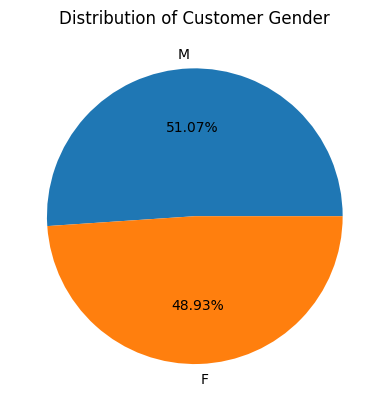

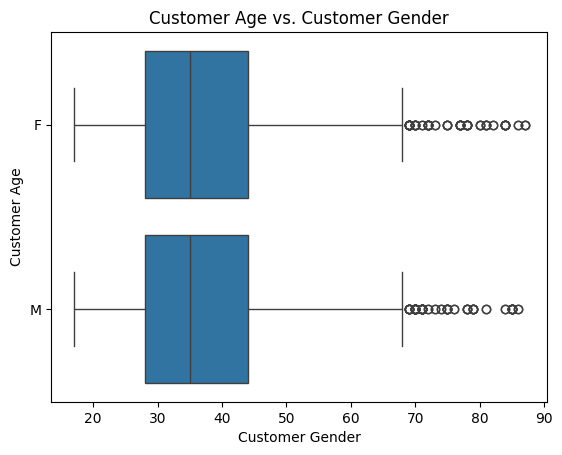

In [16]:
# Univariate barplot for Customer Gender
gender_counts = dotr_df["Customer Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.2f%%")
plt.title("Distribution of Customer Gender")
print()
plt.show()
print()

# Bivariate boxplot for Customer Age
sns.boxplot(x="Customer Age", y="Customer Gender", data=dotr_df)
plt.title("Customer Age vs. Customer Gender")
plt.xlabel("Customer Gender")
plt.ylabel("Customer Age")
plt.show()
print()

### Divide data into input and output

In [17]:
# Selecting relevant columns for logistic regression analysis
lgrdotr_df = dotr_df[["Month", "Customer Age", "Customer Gender", "Country", "Quantity"]]

# Map month names to their equivalent numbers from 1 to 12
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}

# Apply the mapping to the 'Month' column
lgrdotr_df["Month"] = lgrdotr_df["Month"].map(month_map)

# Display the first few rows of the DataFrame
lgrdotr_df.head()

,Month,Customer Age,Customer Gender,Country,Quantity
0,2,29,F,United States,1
1,2,29,F,United States,2
2,2,29,F,United States,3
3,3,29,F,United States,2
4,3,29,F,United States,3


### Encoding

#### 1. Encode the target column (the labels)


In [18]:
# Selecting the target variable
y = lgrdotr_df["Customer Gender"] 

# Initialize the LabelEncoder to encode categorical target variable
label_encoder = LabelEncoder()

# Fit and transform the categorical labels to numerical values
y = label_encoder.fit_transform(y)

# Print the encoded target column
print(y)

[0 0 0 ... 1 1 1]


#### 2. Encode categorical columns

In [19]:
# Perform dummy encoding (one-hot encoding)
dumdotr_df = pd.get_dummies(lgrdotr_df[["Country"]], prefix=["Cty"],drop_first=True,)

# Display the first few rows of the DataFrame
dumdotr_df.head()

,Cty_Germany,Cty_United Kingdom,Cty_United States
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


#### Replace original categorical columns with encoded ones
###### Don't forget Reset indices to ensure proper alignment when I concatenate


In [20]:
# Concatenate dummy variables with the original DataFrame to include one-hot encoded categorical features
endotr_df = pd.concat([lgrdotr_df, dumdotr_df], axis=1)

# Prepare the Features by dropping the target variable and the original categorical columns
X = endotr_df.drop(columns=["Customer Gender", "Country"])

# Display the first few rows of the DataFrame after feature preparation
X.head()

,Month,Customer Age,Quantity,Cty_Germany,Cty_United Kingdom,Cty_United States
0,2,29,1,False,False,True
1,2,29,2,False,False,True
2,2,29,3,False,False,True
3,3,29,2,False,False,True
4,3,29,3,False,False,True


## `Modeling`

In [21]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
# Use cross-validation to predict the target variable on the training set
logy_train_pred = cross_val_predict(logistic_model, X_train_scaled, y_train, cv=3)

# Compute the confusion matrix based on the predicted values and the actual target variable on the training set
logcf_matrix = confusion_matrix(y_train, logy_train_pred)

# Display the confusion matrix
logcf_matrix

array([[4514, 9196],
       [4389, 9793]], dtype=int64)

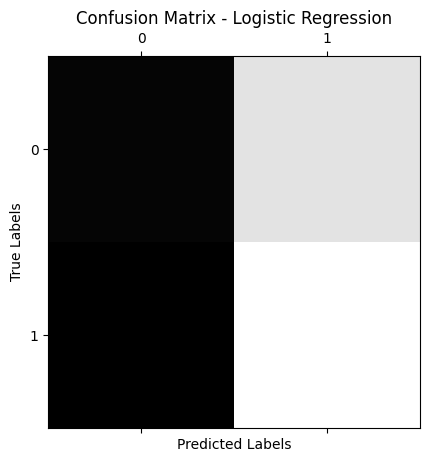

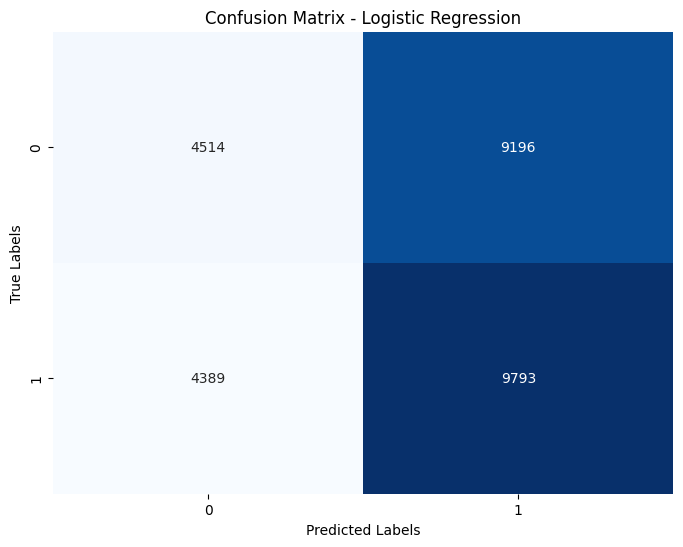


Logistic Regression Metrics:
              precision    recall  f1-score   support

      Female       0.51      0.33      0.40     13710
        Male       0.52      0.69      0.59     14182

    accuracy                           0.51     27892
   macro avg       0.51      0.51      0.49     27892
weighted avg       0.51      0.51      0.50     27892

Accuracy: 0.5129427792915532
ROC AUC Score: 0.5098859609899894



In [23]:
# Compute and visualize the confusion matrix for the logistic regression model
conf_matrix_log = confusion_matrix(y_train, logy_train_pred)
plt.matshow(conf_matrix_log, cmap=plt.cm.gray)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
print()
plt.show()

# Another visualization of the confusion matrix using seaborn's heatmap
conf_matrix_logistic = confusion_matrix(y_train, logy_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
print()
plt.show()

# Print classification report and additional metrics for logistic regression model
target_names = ["Female", "Male"]
print()
print("Logistic Regression Metrics:")
print(classification_report(y_train, logy_train_pred, target_names=target_names))
print("Accuracy:", accuracy_score(y_train, logy_train_pred))
print("ROC AUC Score:", roc_auc_score(y_train, logy_train_pred))
print()

## `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

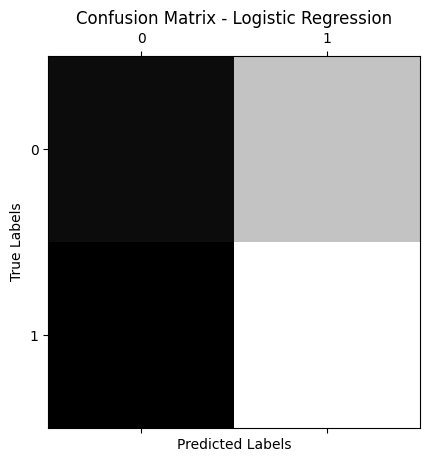

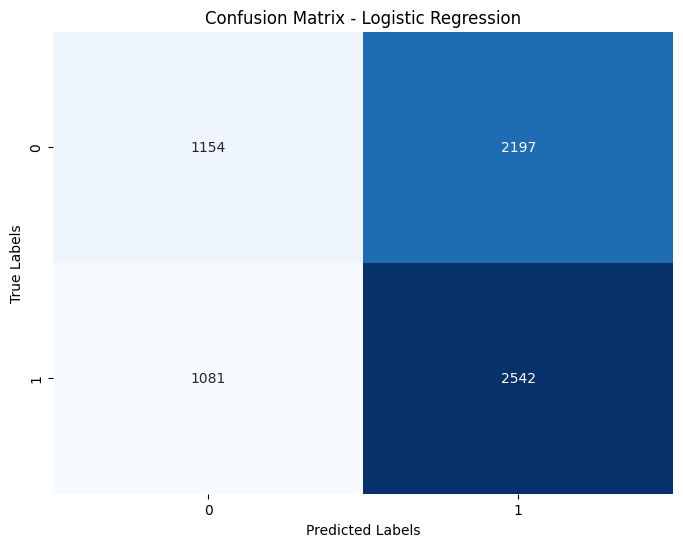

In [24]:
# Predict on Test Data with Logistic Regression Model
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Compute and visualize the confusion matrix for the logistic regression model
conf_matrix_log = confusion_matrix(y_test, y_pred_logistic)
plt.matshow(conf_matrix_log, cmap=plt.cm.gray)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
print()
plt.show()

# Another visualization of the confusion matrix using seaborn's heatmap
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
print()
plt.show()
print()

### Build a classification Report

In [25]:
# Define the target labels for better interpretation
target_names = ["Female", "Male"]

# Print a header for the logistic regression metrics
print()
print("Logistic Regression Metrics:")

# Print the classification report including precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred_logistic, target_names=target_names))

# Print the accuracy score, which measures the proportion of correctly predicted instances
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Print the ROC AUC score, which measures the area under the Receiver Operating Characteristic curve
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logistic))
print()


Logistic Regression Metrics:
              precision    recall  f1-score   support

      Female       0.52      0.34      0.41      3351
        Male       0.54      0.70      0.61      3623

    accuracy                           0.53      6974
   macro avg       0.53      0.52      0.51      6974
weighted avg       0.53      0.53      0.51      6974

Accuracy: 0.5299684542586751
ROC AUC Score: 0.5230016490848572



### Conclusion

Overall, the model performs slightly better in predicting "Male" instances compared to "Female", as evidenced by higher precision, recall, and F1-score for "Male". However, the performance metrics indicate that the model's predictive power is relatively modest, and thus requires significant improvement before deployment.